# Pandas

## Introduction

Pandas stands for 'Python data access library', and is a very convenient way to handle tasks related to data in Python.

By convention, pandas and numpy are imported using their short-forms. Matplotlib and seaborn are also imported, they will be used later on for plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a DataFrame by reading a file

Obviously, in order to do any data-related task, we must first import the data. This is mostly done using `read_csv` (also type `pd.read` into any Jupyter cell and see what other read_* methods are available). The result (when read) is a Pandas DataFrame.

*Note:* Remember to use `help()` or `?` to check syntax for the pandas functions we'll be using in this notebook

In [2]:
df = pd.read_csv('Iris_Data.csv')

Let's take a quick look at some information about the data.

In [3]:
print("The first 5 values in the DataFrame")
print(df.head())
print("\nThe DataFrame has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("\nThe titles of the DataFrames columns are:- ")
print(df.columns.tolist())
print("\nEach of them has a particular datatype")
print(df.dtypes)

The first 5 values in the DataFrame
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

The DataFrame has 5 columns and 150 rows.

The titles of the DataFrames columns are:- 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Each of them has a particular datatype
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Editing a DataFrame

The species names all begin with 'Iris-', making that information redundant. Editing all the data in a particular column is something you will often have to do, whether it's text or numerical data. The following cell contains a few different methods for shortening the 'species' column values.

In [4]:
df['species'] = df.species.str.replace('Iris-', '')
df['species'] = df.species.apply(lambda r: r.replace('Iris-', ''))

print(df.sample(10))

     sepal_length  sepal_width  petal_length  petal_width     species
92            5.8          2.6           4.0          1.2  versicolor
95            5.7          3.0           4.2          1.2  versicolor
67            5.8          2.7           4.1          1.0  versicolor
98            5.1          2.5           3.0          1.1  versicolor
42            4.4          3.2           1.3          0.2      setosa
110           6.5          3.2           5.1          2.0   virginica
85            6.0          3.4           4.5          1.6  versicolor
129           7.2          3.0           5.8          1.6   virginica
68            6.2          2.2           4.5          1.5  versicolor
57            4.9          2.4           3.3          1.0  versicolor


## Describing a DataFrame

Let's take a look at the built-in descriptive stats and count how many of each species we have in this dataset.

In [5]:
df_stats = df.describe()
print(df_stats)
print('\nCounts of various species in the Iris dataset.')
print(df.species.value_counts())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Counts of various species in the Iris dataset.
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


`df_stats` is itself a DataFrame and can be edited like one. For example, let's rename the 50%-quartile to 'median' (which is what it mathematically is) and calculate a new row called 'range' which is the difference between max and min.

In [6]:
df_stats.rename({'50%': 'median'}, inplace=True)
df_stats.loc['range'] = df_stats.loc['max'] - df_stats.loc['min']  # Just a simple vector subtraction
print(df_stats)

        sepal_length  sepal_width  petal_length  petal_width
count     150.000000   150.000000    150.000000   150.000000
mean        5.843333     3.054000      3.758667     1.198667
std         0.828066     0.433594      1.764420     0.763161
min         4.300000     2.000000      1.000000     0.100000
25%         5.100000     2.800000      1.600000     0.300000
median      5.800000     3.000000      4.350000     1.300000
75%         6.400000     3.300000      5.100000     1.800000
max         7.900000     4.400000      6.900000     2.500000
range       3.600000     2.400000      5.900000     2.400000


## Aggregation and Grouping

We've already seen (from `describe()`) the mean and median of each of the 4 numerical features (sepal and petal width/length). Let's calculate these stats again, but specifically for each of the species in our dataset.

In [7]:
print('The mean numbers grouped by species')
print(df.groupby('species').mean())
print('\nThe median numbers grouped by species')
print(df.groupby('species').median())

The mean numbers grouped by species
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

The median numbers grouped by species
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


If we needed this aggregations to be in the same output DataFrame, we could use the `agg()` method.

In [8]:
print(df.groupby('species').agg(['mean', 'median']))  # Certain pre-defined stats can be specified as strings
# print(df.groupby('species').agg([np.mean, np.median]))  # This just specifies the python function used

           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  


## Plotting with DataFrames

When it comes to plotting data, matplotlib can be used directly. For convenience, creating the plot axes allows direct setting of the labels and title.

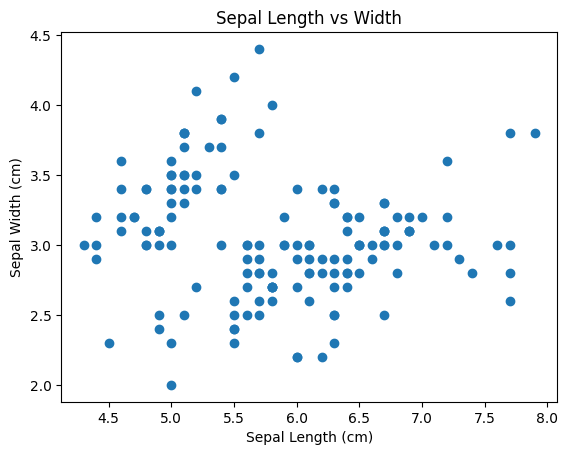

In [10]:
ax = plt.axes()
ax.scatter(df.sepal_length, df.sepal_width)
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')
plt.show()

Similarly, histograms can be plotted of our numeric data.

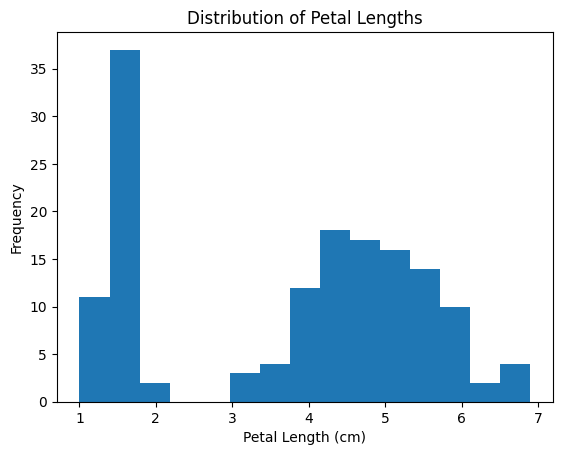

In [11]:
plt.hist(df.petal_length, bins=15)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Lengths')
plt.show()

Pandas actually provides its own built-in plotting functionality (based on matplotlib, and with a few extra settings like the grid you can see below).

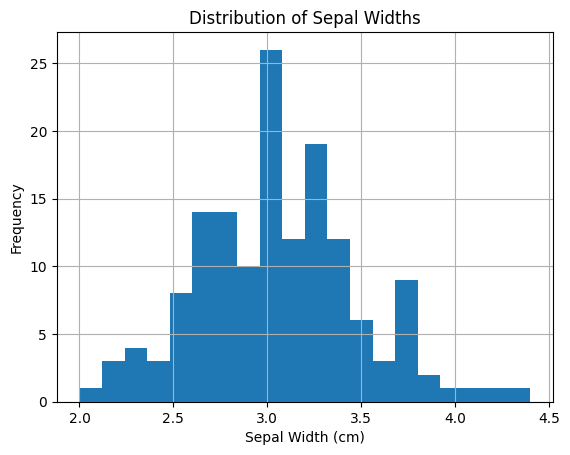

In [12]:
ax = df.sepal_width.hist(bins=20)
ax.set(xlabel='Sepal Width (cm)',
       ylabel='Frequency',
       title='Distribution of Sepal Widths')
plt.show()

Pandas' `df.plot` includes other plotting methods, such as this interesting overlaid histogram shown below.

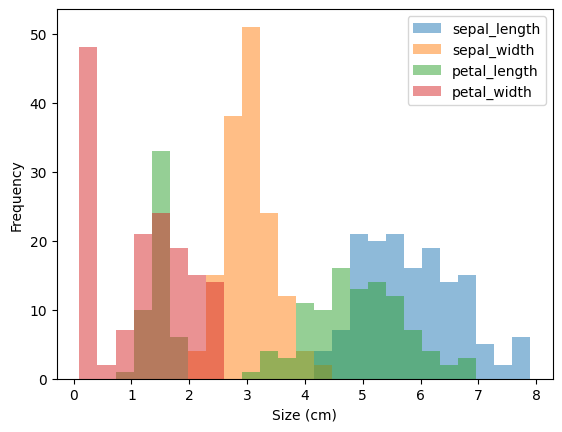

In [13]:
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')
plt.show()

A 'boxplot' is a common way to represent the distribution of a numerical value (the box itself representing the 25%-75% quartiles, and the tails representing the max/min range).

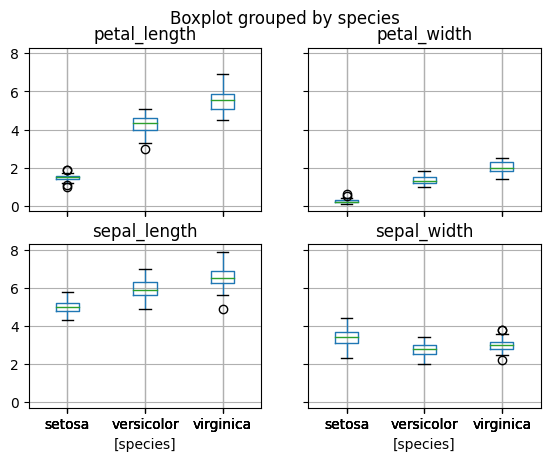

In [14]:
df.boxplot(by='species')
plt.show()